In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from metpy.plots import Hodograph

# figure beautification
%config InlineBackend.figure_format = 'retina'

In [2]:
# plot hodograph for selected wind profile
# iwnd = 1; RKW-type wind profile

# udep1   =     0.0    ! height of bottom of shear layer (m)
# udep2   =  2500.0    ! height of top of shear layer (m)
# uconst1 =     0.0    ! u at bottom of shear layer
# uconst2 =    10.0    ! u at top of shear layer

def wndprofile(z, udep1, udep2, uconst1, uconst2):
    # initialise wind vectors
    u = np.zeros(len(z))
    v = np.zeros(len(z))
    
    # u-direction
    for i in range(len(u)):
        if z[i] < udep1:
            u[i] = uconst1
        elif z[i] >= udep1 and z[i] <= udep2:
            u[i] = (uconst2-uconst1) * (z[i]-udep1)/(udep2-udep1) + uconst1
        else:
            u[i] = uconst2

    return u, v


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[   0.          357.14285714  714.28571429 1071.42857143 1428.57142857
 1785.71428571 2142.85714286 2500.         2857.14285714 3214.28571429
 3571.42857143 3928.57142857 4285.71428571 4642.85714286 5000.        ]


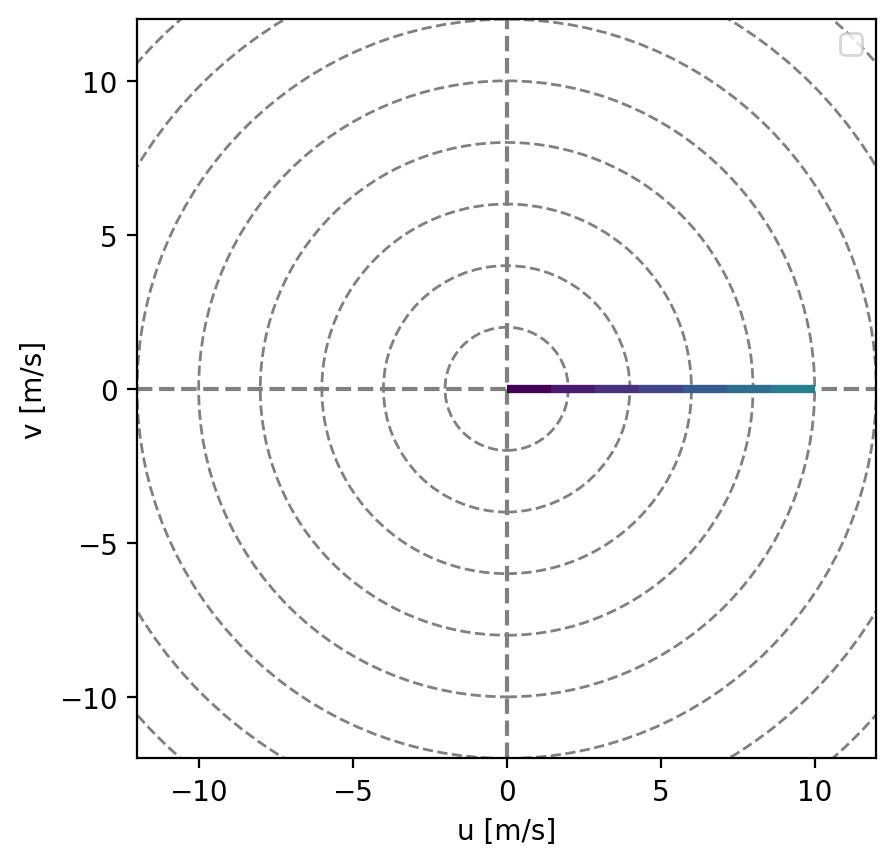

In [3]:
zh = np.linspace(0, 5000, 15)
print(zh)

u, v = wndprofile(zh, udep1=0, udep2=2500, uconst1=0, uconst2=10)

fig, ax = plt.subplots()
h = Hodograph(ax=ax, component_range=12)
h.add_grid(increment=2)
h.plot_colormapped(u, v, zh)
#h.wind_vectors(u, v)
ax.set_xlabel("u [m/s]")
ax.set_ylabel("v [m/s]")
ax.legend()
fig.savefig("../figs/hodograph.png", bbox_inches="tight")

# add legend?

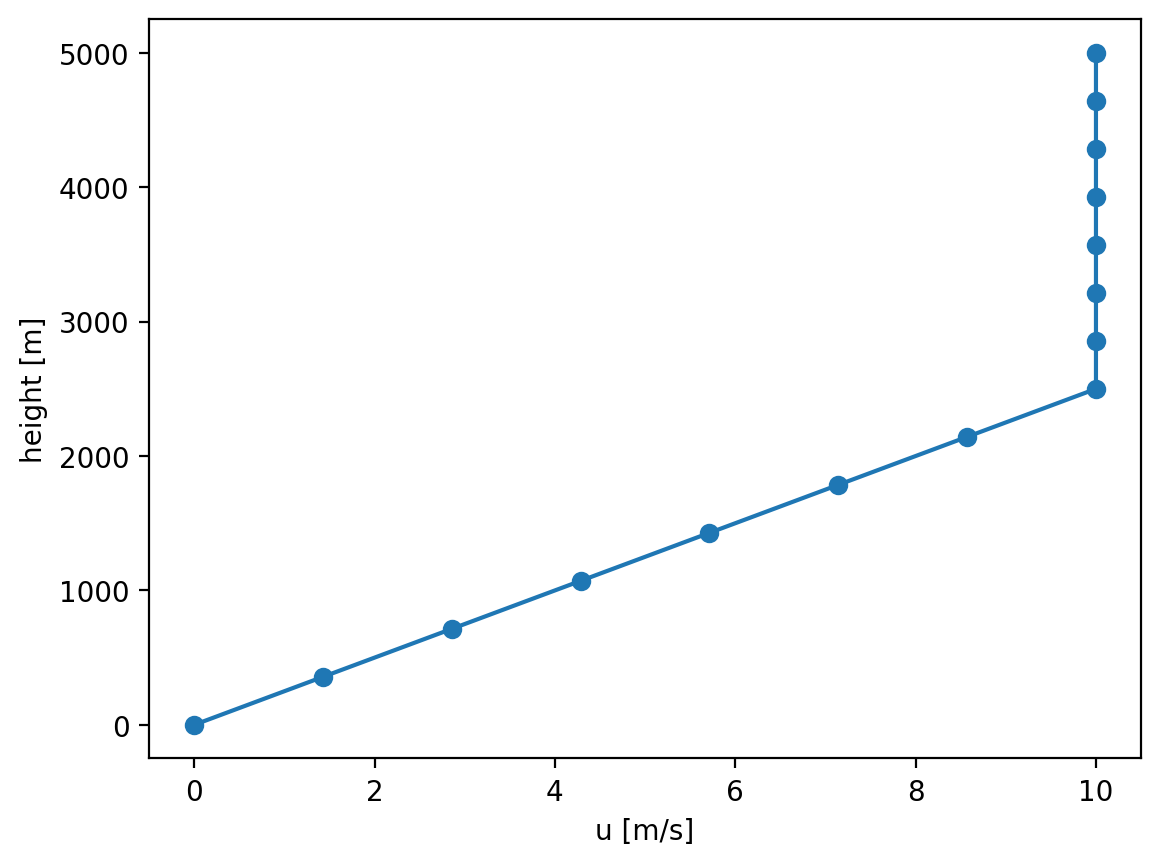

In [4]:
fig, ax = plt.subplots()
ax.plot(u, zh)
ax.scatter(u, zh)
ax.set_xlabel("u [m/s]")
ax.set_ylabel("height [m]")
fig.savefig("../figs/windprofil.png", bbox_inches="tight")